# Cálculo numérico del misil

Para el problema del misil visto en clase, encontramos una ecuación transcendental para el tiempo de vuelo.

\begin{equation}
T=\frac{kV+g}{gk}(1-e^{-kt})
\end{equation}

a)Usando algún algoritmo recursivo, crea un código que calcule T para diferentes valores de k, el ángulo y la velocidad inicial.

b) Con la velocidad inicial de 500m/s y un ángulo inicial de 65 grados, graficar el Rango contra k para (k=0, k=0.05 y otros 3 valores entre 0 y 1). Compararlo con la aproximación vista en clase basado en teoría de perturbaciones.

c) Usando los mismos datos iniciales del punto anterior, graficar Distancia Vertical contra Distancia Horizontal para k=0, y otros 4 valores entre 0 y 1.

d)Usando los mismos datos iniciales que en los puntos antioreres, graficar Altura contra Tiempo, Valocidad Horizontal contra Tiempo y Velocidad Vertical contra Tiempo para k=0, y otros 4 valores entre 0 y 1.

e)Búscar el ángulo que da la distancia máxima numéricamente para k=0, y otros 4 valores entre 0 y 1.

## a) Código

Aqui se implemento el método Newton-Raphson para calcular T de la ecuación trascendental.

Para conocer el número que se acerca a la raiz de la función se grafico $f(T)=T$  y  $g(x)=\frac{kV+g}{gk}(1-e^{-kt})$.

La velocidad inicial $v_0$ y el ángulo $\theta$ se dejaron fijos como: $v_0=500$ m/s y $\theta=65$  grados

In [137]:
#Librerias usadas.
import matplotlib. pyplot as plt
import numpy as np
import sys
import math

### Graficar las funciones $f$ y $g$ para distintos valores de k 

In [138]:
def graf(v,th,k1,k2,k3,k4):  #Función para graficar funciones T y (1-e^t) para diferentes valores de k 
   
    g=float(9.81)
    vy=v*math.sin(math.radians(th))
    
    t=np.arange(0,100,0.1)
    F=t
    G=((k1*vy+g)/(g*k1))*(1-np.exp(-k1*t))
    H=((k2*vy+g)/(g*k2))*(1-np.exp(-k2*t))
    I=((k3*vy+g)/(g*k3))*(1-np.exp(-k3*t))
    J=((k4*vy+g)/(g*k4))*(1-np.exp(-k4*t))
    
    # Primera grÃ¡fica
    plt.subplot(2,2,1)
    plt.plot(t,F)
    plt.plot(t,G)
    plt.title("k1")

     # Segunda grÃ¡fica
    plt.subplot(2,2,2)
    plt.plot(t,F)
    plt.plot(t,H)
    plt.title("k2")

    # Tercera grÃ¡fica 
    plt.subplot(2,2,3)
    plt.plot(t,F)
    plt.plot(t,I)
    plt.xlabel('tiempo')

    # Cuarta grÃ¡fica	
    plt.subplot(2,2,4)
    plt.plot(t,F)
    plt.plot(t,J)
    plt.xlabel('tiempo')
    
    plt.show()

Esta parte se usara para graficar las funciones para distintos valores de $k$ y así ver el punto más cercano a la intersección.

Velocidad inicial: 500
Ángulo theta: 65
Parametro k1: 0.05
Parametro k2: 0.5
Parametro k3: 0.9
Parametro k4: 0.1


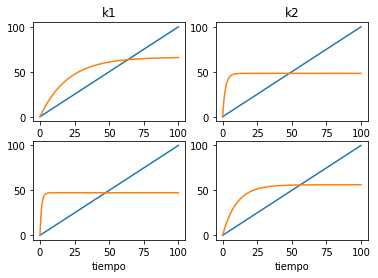

In [139]:
v=float(input("Velocidad inicial: "))
th=float(input("Ángulo theta: "))
k1=float(input("Parametro k1: "))
k2=float(input("Parametro k2: "))
k3=float(input("Parametro k3: "))
k4=float(input("Parametro k4: "))
graf(v,th,k1,k2,k3,k4)


### Cuando $k=0$

Cuando $k=0$ la soluciones a las ecuaciones diferenciales son:

\begin{equation}
x(t)=v_0 t \cos(\theta)
\end{equation}
\begin{equation}
y(t)=\frac{-gt^2}{2}+v_0 t \sin(\theta)
\end{equation}

Las siguientes líneas de programa son funciones para calcular el tiempo de vuelo y rangos:  

In [140]:
#tiempo de vuelo para k=0
def tmax(v,th):
    g=float(9.81)
    return float((2*v*math.sin(math.radians(th))/(g)))

In [141]:
#distancia horizontal maxima para k=0
def xmax(v,th):
    g=float(9.81)
    return float((v*v*math.sin(math.radians(2*th))/(g)))

In [142]:
#Funciones para graficar posición horizontal x contra tiempo T y posición vertical y contra tiempo T
def X0(t,v,th):
    g=float(9.81)
    ux=v*math.cos(math.radians(th))
    return ux*t
def Y0(t,v,th):
    g=float(9.81)
    vy=v*math.sin(math.radians(th))
    return (-g*(t**2)/2)+(vy*t)

In [143]:
#Funciones para graficar posición horizontal x contra posición vertical parametrizando con t
def X0n(x,t,v,th):
    g=float(9.81)
    ux=v*math.cos(math.radians(th))
    for i in range(len(t)):
        x.append(ux*t[i])
def Y0n(y,t,v,th):
    g=float(9.81)
    vy=v*math.sin(math.radians(th))
    for i in range(len(t)):
        y.append((-g*(t[i]**2)/2)+(vy*t[i]))

In [144]:
#Funciones para graficar velocidad horizontal x contra velocidad vertical parametrizando con t
def D0x(t,x,v,th):
    g=(float(9.81))
    ux=v*math.cos(math.radians(th))
    for i in range(len(t)):
        x.append(ux)
def D0y(t,v,th):
    g=(float(9.81))
    vy=v*math.sin(math.radians(th))
    return (-g*(t))+(vy)

### Método Numérico:

Se uso el método de Newton-Raphson cuando $k$ es diferente de cero.

In [145]:
#Definir funciones.
def error(x,y):
    return float(abs((x-y)/x)*100)

def fun(v,th,x,k):
    vy=float(v*math.sin(math.radians(th)))
    g=float(9.81)
    return float((((k * vy) + g)/(k * g))*(1 - np.exp(-k*x)) - x)

def dfun(v,th,x,k):
    vy=float(v*math.sin(math.radians(th)))
    g=float(9.81)
    return float((((k * vy) + g)/(k * g))*(np.exp(-k*x))*(-k)-1)

In [146]:
def metodo(v,th,k):
    root0=float(input('\nIngrese el número que se acerque a la raiz de la función de k={0:}: '.format(k)))
    TOL=float(0.0005)
    i=int(0)
    root=float(root0)
    fp=open('raices_k.dat',"w")
    fp.write("#Iteracion\tRaiz\tValor en la funcion\tError aproximado\n")

    while i<=200:
        rootold=float(root)
        root=rootold-(fun(v,th,rootold,k)/dfun(v,th,rootold,k))
        if root != 0:
            ea=float(error(root,rootold))
        fp.write("%d\t\t%f  \t%f  \t%f\n" % ( i+1, root, fun(v,th,root,k), ea) )
        if ea < TOL and fun(v,th,root,k) == 0 :
            break 
        i=i+1
    if i==200:
        fp.write("\nLa raiz no esta convergiendo")
    fp.close()

In [147]:
#Función que encuentra el valor de T en el que se entesectan las funciones (valor máximo de T en el archivo .dat )
def maximo(k):
    raiz=np.loadtxt('raices_k.dat')    
    maximo=0
    for i in range(len(raiz)):
        if raiz[i][1]>=maximo:
            maximo=raiz[i][1]
    return maximo

Aquí se lleva a cabo el método empleado donde el usuario ingresara los valores cercanos a la intersección.

Los intervalos de T para cada k se guardan en un arrego para graficarlo despues.

In [148]:
g=float(9.81)
ux=v*math.cos(math.radians(th))
print("Parametro K=0")
print("* Tiempo que dura en el aire el proyectil: ",max(t0))
print("* El rango maximo de x1 es: ", (ux/k1)*(1-np.exp(-k1*max(t0))))

metodo(v,th,k1)
t1=[]
t1=np.arange(0, maximo(k1), 0.001)
print("* Tiempo que dura en el aire el proyectil: ",max(t1))
print("* El rango maximo de x1 es: ", (ux/k1)*(1-np.exp(-k1*max(t1))))
metodo(v,th,k2)
t2=[]
t2=np.arange(0, maximo(k2), 0.001)
print("* Tiempo que dura en el aire el proyectil: ",max(t2))
print("* El rango maximo de x2 es: ", (ux/k2)*(1-np.exp(-k2*max(t2))))
metodo(v,th,k3)
t3=[]
t3=np.arange(0, maximo(k3), 0.001)
print("* Tiempo que dura en el aire el proyectil: ",max(t3))
print("* El rango maximo de x3 es: ", (ux/k3)*(1-np.exp(-k3*max(t3))))
metodo(v,th,k4)
t4=[]
t4=np.arange(0, maximo(k4), 0.001)
print("* Tiempo que dura en el aire el proyectil: ",max(t4))
print("* El rango maximo de x4 es: ", (ux/k4)*(1-np.exp(-k4*max(t4))))

Parametro K=0
* Tiempo que dura en el aire el proyectil:  92.386
* El rango maximo de x1 es:  4184.513743955424

Ingrese el número que se acerque a la raiz de la función de k=0.05: 50
* Tiempo que dura en el aire el proyectil:  63.414
* El rango maximo de x1 es:  4048.7919590106308

Ingrese el número que se acerque a la raiz de la función de k=0.5: 30
* Tiempo que dura en el aire el proyectil:  48.193
* El rango maximo de x2 es:  422.61826172621267

Ingrese el número que se acerque a la raiz de la función de k=0.9: 25
* Tiempo que dura en el aire el proyectil:  47.304
* El rango maximo de x3 es:  234.78792318927745

Ingrese el número que se acerque a la raiz de la función de k=0.1: 30
* Tiempo que dura en el aire el proyectil:  55.984
* El rango maximo de x4 es:  2105.26487273838


### Gráficas de para cada valor de k

In [149]:
#Funciones para graficar posición horizontal x contra tiempo T y posición vertical y contra tiempo T
def X(t,k,v,th):
    g=float(9.81)
    ux=v*math.cos(math.radians(th))
    return (ux/k)*(1-np.exp(-k*t))
def Y(t,k,v,th):
    g=float(9.81)
    vy=v*math.sin(math.radians(th))
    return -g*t/k+((k*vy+g)/k**2)*(1-np.exp(-k*t))

In [150]:
#Funciones para graficar posición horizontal x contra posición vertical parametrizando con t
def Xn(x,t,k,v,th):
    g=float(9.81)
    ux=v*math.cos(math.radians(th))
    for i in range(len(t)):
        x.append((ux/k)*(1-np.exp(-k*t[i])))
def Yn(y,t,k,v,th):
    g=float(9.81)
    vy=v*math.sin(math.radians(th))
    for i in range(len(t)):
        y.append(-(g*t[i]/k)+(((k*vy+g)/k**2)*(1-np.exp(-k*t[i]))))

In [151]:
#Funciones para graficar velocidad horizontal x contra velocidad vertical parametrizando con t
def Dx(t,k,v,th):
    g=(float(9.81))
    ux=v*math.cos(math.radians(th))
    return (ux/k)*(k*np.exp(-k*t))
def Dy(t,k,v,th):
    g=(float(9.81))
    vy=v*math.sin(math.radians(th))
    return -(g/k)+((k*vy+g)/k**2)*(k*np.exp(-k*t))

### Distancia horizontal para cada k

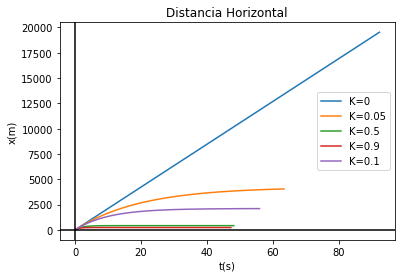

In [152]:
t0=np.arange(0, tmax(v,th), 0.001)

plt.plot(t0, X0(t0,v,th))
plt.plot(t1, X(t1,k1,v,th))
plt.plot(t2, X(t2,k2,v,th))
plt.plot(t3, X(t3,k3,v,th))
plt.plot(t4, X(t4,k4,v,th))
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.title("Distancia Horizontal")
plt.legend(("K={0}".format(0), "K={0}".format(k1),"K={0}".format(k2),"K={0}".format(k3),"K={0}".format(k4)))
plt.show()

### Distancia vertical para cada k

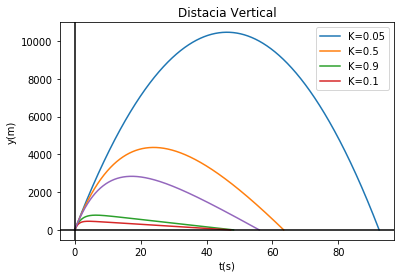

In [153]:
plt.plot(t0, Y0(t0,v,th))
plt.plot(t1, Y(t1,k1,v,th))
plt.plot(t2, Y(t2,k2,v,th))
plt.plot(t3, Y(t3,k3,v,th))
plt.plot(t4, Y(t4,k4,v,th))
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlabel("t(s)")
plt.ylabel("y(m)")
plt.title("Distacia Vertical")
plt.legend(("K={0}".format(k1),"K={0}".format(k2),"K={0}".format(k3),"K={0}".format(k4)))
plt.show()

### Distancia vertical Vs. distancia horizontal para cada k

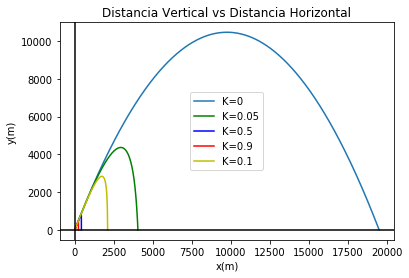

In [154]:
X0=[]
Y0=[]
X0n(X0,t0,v,th)
Y0n(Y0,t0,v,th)
plt.plot(X0,Y0,'-')
X1=[]
Y1=[]
Xn(X1,t1,k1,v,th)
Yn(Y1,t1,k1,v,th)
plt.plot(X1,Y1,'g-')
X2=[]
Y2=[]
Xn(X2,t2,k2,v,th)
Yn(Y2,t2,k2,v,th)
plt.plot(X2,Y2,'b-')
X3=[]
Y3=[]
Xn(X3,t3,k3,v,th)
Yn(Y3,t3,k3,v,th)
plt.plot(X3,Y3,'r-')
X4=[]
Y4=[]
Xn(X4,t4,k4,v,th)
Yn(Y4,t4,k4,v,th)
plt.plot(X4,Y4,'y-')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
#plt.xlim(0, 4500)
plt.title("Distancia Vertical vs Distancia Horizontal")
plt.legend(("K={0}".format(0),"K={0}".format(k1),"K={0}".format(k2),"K={0}".format(k3),"K={0}".format(k4)))
plt.show()

### Velociada horizontal

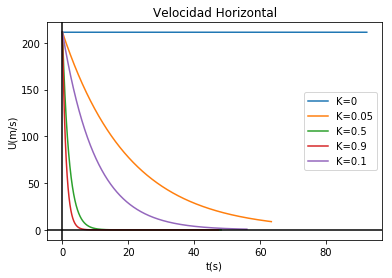

In [155]:
u0=[]
D0x(t0,u0,v,th)
plt.plot(t0, u0)
plt.plot(t1, Dx(t1,k1,v,th))
plt.plot(t2, Dx(t2,k2,v,th))
plt.plot(t3, Dx(t3,k3,v,th))
plt.plot(t4, Dx(t4,k4,v,th))
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlabel("t(s)")
plt.ylabel("U(m/s)")
plt.title("Velocidad Horizontal")
plt.legend(("K=0","K={0}".format(k1),"K={0}".format(k2),"K={0}".format(k3),"K={0}".format(k4)))
plt.show()

### Velociada vertical

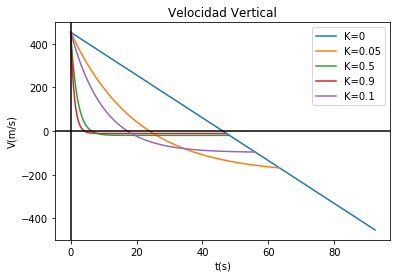

In [156]:
plt.plot(t0, D0y(t0,v,th))
plt.plot(t1, Dy(t1,k1,v,th))
plt.plot(t2, Dy(t2,k2,v,th))
plt.plot(t3, Dy(t3,k3,v,th))
plt.plot(t4, Dy(t4,k4,v,th))
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlabel("t(s)")
plt.ylabel("V(m/s)")
plt.title("Velocidad Vertical")
plt.legend(("K={0}".format(0),"K={0}".format(k1),"K={0}".format(k2),"K={0}".format(k3),"K={0}".format(k4)))
plt.show()